In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titatic_df = pd.read_csv('../../data/titanic_train.csv')
titatic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
titatic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Preprocessing

In [4]:
# 결손값 처리
titatic_df['Age'].fillna(titatic_df['Age'].mean(),inplace = True)
titatic_df['Cabin'].fillna('N',inplace=True)
titatic_df['Embarked'].fillna('N',inplace=True)
print('데이터셋 결손값:',titatic_df.isnull().sum())

데이터셋 결손값: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [5]:
print('Sex 값 분포:\n',titatic_df["Sex"].value_counts())
print('Cabin 값 분포:\n',titatic_df["Cabin"].value_counts())
print('Embarked 값 분포:\n',titatic_df["Embarked"].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64
Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [6]:
# 문자열 데이터 처리
# 객실 데이터의 경우, 맨 앞 알파벳 하나(객실등급)만 유지시킨다.
titatic_df['Cabin'] = titatic_df['Cabin'].str[:1]
print(titatic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


### 성별에 따른 생존률

In [7]:
titatic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

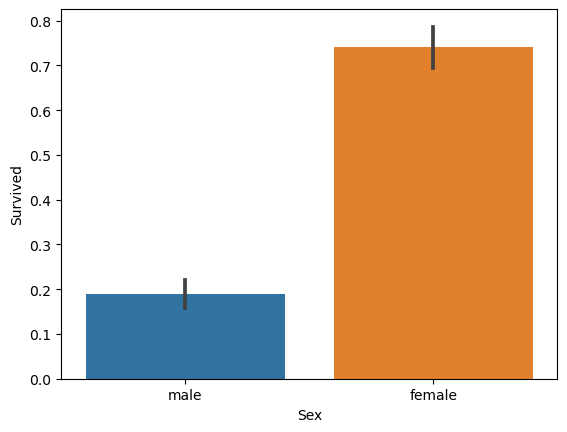

In [8]:
# 시각화
sns.barplot(x='Sex',y='Survived',data = titatic_df)

### 선실 등급과 성별에 따른 생존률

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

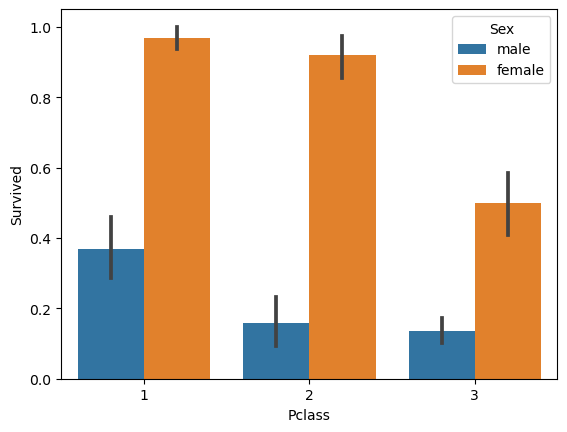

In [10]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titatic_df)

### 나이에 따른 생존률

In [11]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age<=5: cat = 'Baby'
    elif age<=12:cat='Child'
    elif age<=18:cat='Teenager'
    elif age<=25:cat='Student'
    elif age<=35:cat='Young Adult'
    elif age<=60:cat='Adult'
    else: cat='Elderly'
    return cat

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

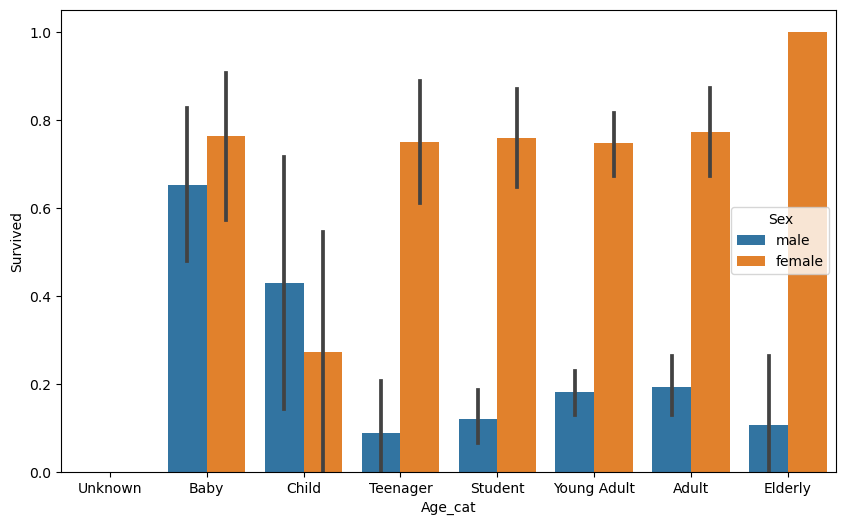

In [13]:
plt.figure(figsize=(10,6))
group_names = ["Unknown",'Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
titatic_df['Age_cat'] = titatic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titatic_df,order=group_names)

In [14]:
titatic_df.drop('Age_cat',axis=1,inplace=True)

## Age,Pclass,Sex 가 생존률(종속변수)에 대한 주요한 독립변수(피처)임을 알 수 있다.

# Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [16]:
def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

In [17]:
titatic_df = encode_features(titatic_df)
titatic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [18]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# Predict

In [21]:
titanic_df = pd.read_csv('../../data/titanic_train.csv')
# y_titanic_df : Label Dataset
y_titanic_df = titatic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
# X_titanic_df : Feature Dataset
X_titanic_df = transform_features(X_titanic_df)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,
                                                 test_size=0.2,random_state=11)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [27]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train,y_train)
pred_dt_clf = dt_clf.predict(X_test)
print('DecisionTreeClassifier의 accuracy:',np.round(accuracy_score(y_test,pred_dt_clf),4))

DecisionTreeClassifier의 accuracy: 0.7877


## Cross Validation

In [31]:
# K-Fold CV
from sklearn.model_selection import StratifiedKFold,KFold
kfold = KFold(n_splits=5)
kfold_scores=[]
for train_idx, test_idx in kfold.split(X_titanic_df):
    X_train, X_test = X_titanic_df.iloc[train_idx],X_titanic_df.iloc[test_idx]
    y_train, y_test = y_titanic_df.iloc[train_idx],y_titanic_df.iloc[test_idx]
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    kfold_scores.append(accuracy_score(y_test,pred))
print('5 폴드 CV 평균 평가결과:',np.mean(kfold_scores))

5 폴드 CV 평균 평가결과: 0.782298662984119


In [33]:
# Stratified K-Fold by cross_val_score() function
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
print('Stratified 5폴드 CV 평균 평가결과:',np.mean(scores))

Stratified 5폴드 CV 평균 평가결과: 0.7879291946519366


In [37]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf,param_grid=parameters,cv=5,scoring='accuracy',refit=True)
grid_dclf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [35]:
print('GridSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 점수:',grid_dclf.best_score_)

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 점수: 0.812075248694967


In [36]:
pd.DataFrame(grid_dclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001729,0.001494,0.000845,0.000874,2,1,2,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.748252,0.762238,0.825175,0.774648,0.746479,0.771358,0.028786,28
1,0.001400,0.000800,0.003619,0.004764,2,1,3,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.748252,0.762238,0.825175,0.774648,0.746479,0.771358,0.028786,28
2,0.001801,0.000980,0.000807,0.000404,2,1,5,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.748252,0.762238,0.825175,0.774648,0.746479,0.771358,0.028786,28
3,0.002915,0.005830,0.000101,0.000201,2,5,2,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.748252,0.762238,0.825175,0.774648,0.746479,0.771358,0.028786,28
4,0.000000,0.000000,0.003131,0.006262,2,5,3,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.748252,0.762238,0.825175,0.774648,0.746479,0.771358,0.028786,28
5,0.000000,0.000000,0.006250,0.007655,2,5,5,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.748252,0.762238,0.825175,0.774648,0.746479,0.771358,0.028786,28
6,0.000000,0.000000,0.003125,0.006250,2,8,2,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.748252,0.762238,0.825175,0.774648,0.746479,0.771358,0.028786,28
7,0.003027,0.006054,0.000000,0.000000,2,8,3,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.748252,0.762238,0.825175,0.774648,0.746479,0.771358,0.028786,28
8,0.003131,0.006263,0.000000,0.000000,2,8,5,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.748252,0.762238,0.825175,0.774648,0.746479,0.771358,0.028786,28
9,0.006250,0.007654,0.000000,0.000000,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.797203,0.804196,0.818182,0.795775,0.774648,0.798001,0.014118,10


In [38]:
best_dclf = grid_dclf.best_estimator_
best_dclf.fit(X_train,y_train)
best_pred = best_dclf.predict(X_test)
accuracy_score(y_test,best_pred)

0.8651685393258427